In [1]:
#https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data
#dataset used

In [2]:
#import libraries for dataframing and visualation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import libraries for numerical correlation 
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

#libraries for classification, model testing and comparision
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble, neighbors, naive_bayes, svm

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data from csv file
penguin_data = pd.read_csv("penguins_size.csv")

In [4]:
#return the first 5 rows of the dataframe
penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
#view descriptive statistics of the data
penguin_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
#print a concise summary of the dataframe
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
#check for missing values by column
penguin_data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
#drop entries with missing values
penguin_data = penguin_data.dropna()
penguin_data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
#checking for the amount of entries for each species
penguin_data['species'].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

In [10]:
#remove the row with the label "."
penguin_data = penguin_data.drop(penguin_data[penguin_data['sex'] == '.'].index)
penguin_data['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

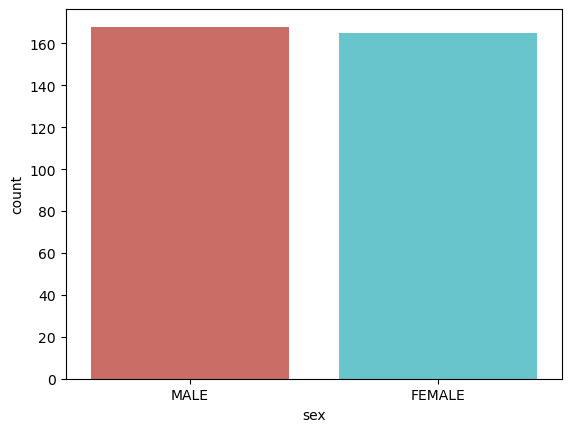

In [11]:
#plot penguin data regarding male and female distribution
sns.countplot(x="sex", data=penguin_data, palette="hls")
plt.show()

In [12]:
#get percentage of male and female
countMale = len(penguin_data[penguin_data.sex == 'MALE'])
countFemale = len(penguin_data[penguin_data.sex == 'FEMALE'])

print("Percentage of Males: {:.2f}%".format((countMale / (len(penguin_data.sex))*100)))
print("Percentage of Females: {:.2f}%".format((countFemale / (len(penguin_data.sex))*100)))

Percentage of Males: 50.45%
Percentage of Females: 49.55%


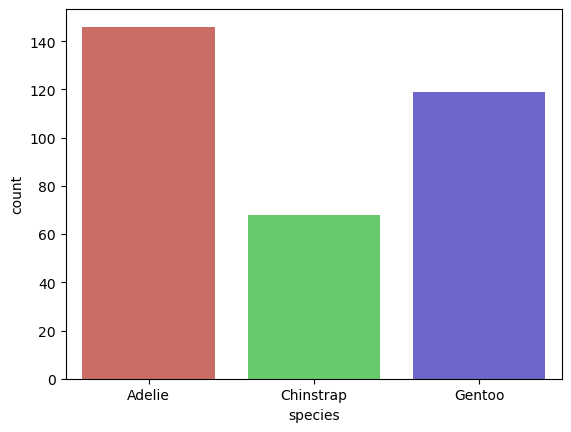

In [13]:
#plot species data
sns.countplot(x="species", data=penguin_data, palette="hls")
plt.show()

In [14]:
#getting the epercentage of each species of penguin 
countAdelie = len(penguin_data[penguin_data.species == 'Adelie'])
countChinstrap = len(penguin_data[penguin_data.species == 'Chinstrap'])
countGentoo = len(penguin_data[penguin_data.species == 'Gentoo'])

print("Percentage of Adelie penguins: {:.2f}%".format((countAdelie / (len(penguin_data.species))*100)))
print("Percentage of Chinstrap penguins: {:.2f}%".format((countChinstrap / (len(penguin_data.species))*100)))
print("Percentage of Gentoo penguins: {:.2f}%".format((countGentoo / (len(penguin_data.species))*100)))

Percentage of Adelie penguins: 43.84%
Percentage of Chinstrap penguins: 20.42%
Percentage of Gentoo penguins: 35.74%


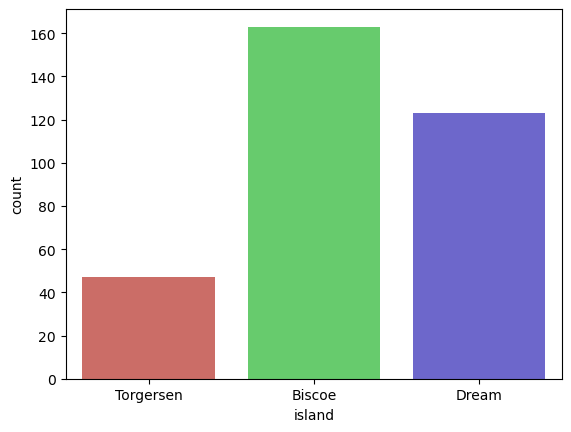

In [15]:
#plotting the island data
sns.countplot(x="island", data=penguin_data, palette="hls")
plt.show()

In [16]:
#getting the percentage amount of penguins on each island
countTorgersen = len(penguin_data[penguin_data.island == 'Torgersen'])
countBiscoe = len(penguin_data[penguin_data.island == 'Biscoe'])
countDream = len(penguin_data[penguin_data.island == 'Dream'])

print("Percentage of penguins from Torgersen: {:.2f}%".format((countTorgersen / (len(penguin_data.island))*100)))
print("Percentage of penguins from Biscoe: {:.2f}%".format((countBiscoe / (len(penguin_data.island))*100)))
print("Percentage of penguins from Dream: {:.2f}%".format((countDream / (len(penguin_data.island))*100)))

Percentage of penguins from Torgersen: 14.11%
Percentage of penguins from Biscoe: 48.95%
Percentage of penguins from Dream: 36.94%


In [17]:
#show the descriptive statistics of the numerical values within the dataset
penguin_data[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


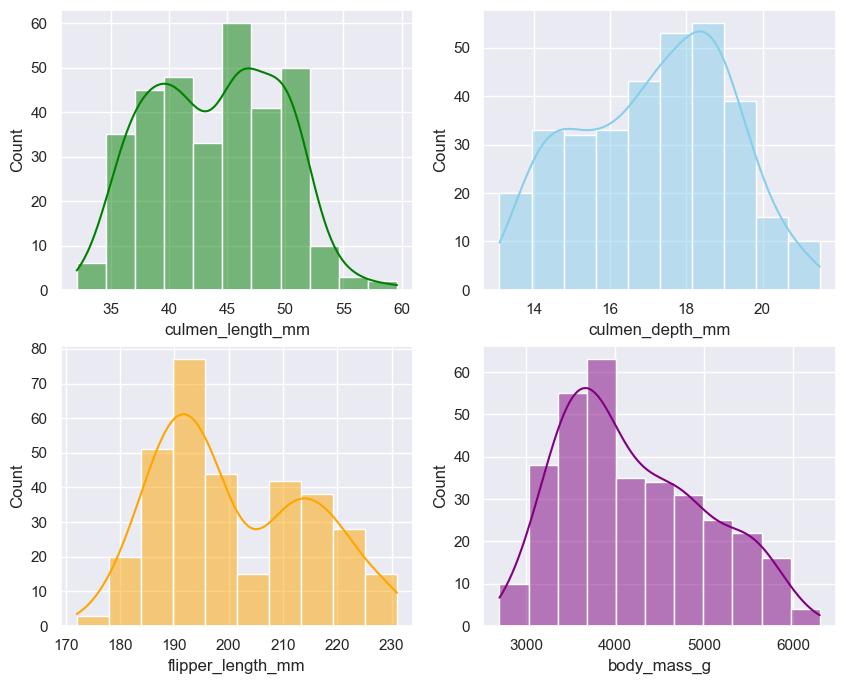

In [18]:
#plot a histogram where we can see if the data is positively or negatively skewed and if it has any outliers
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=penguin_data, x="culmen_length_mm", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=penguin_data, x="culmen_depth_mm", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=penguin_data, x="flipper_length_mm", kde=True, ax=axs[1, 0], color='orange');
sns.histplot(data=penguin_data, x="body_mass_g", kde=True, ax=axs[1, 1], color='purple');

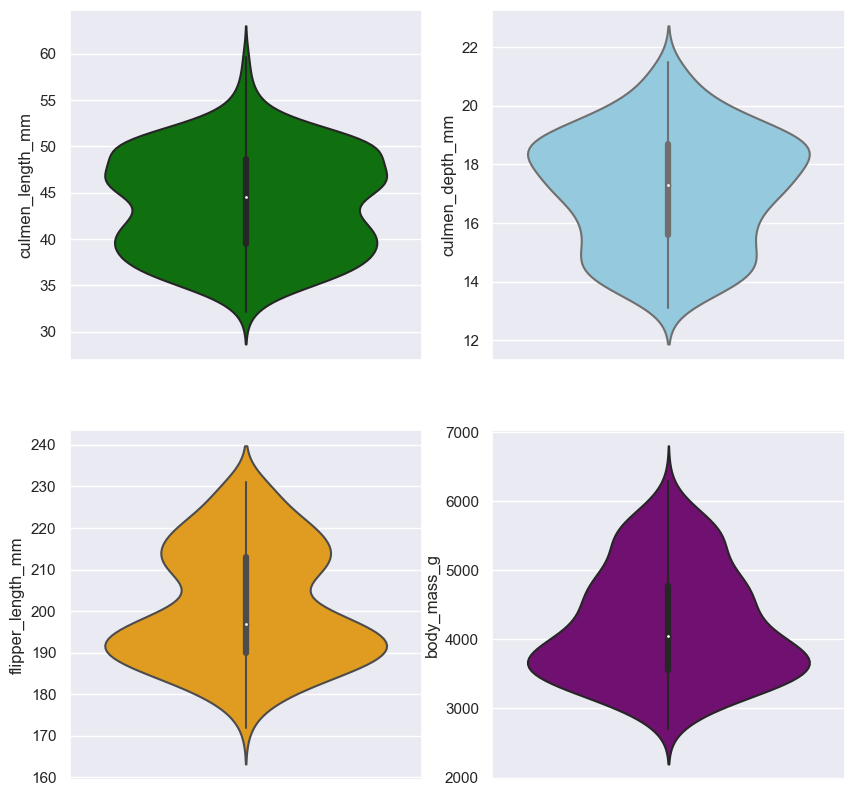

In [19]:
#Similarly, we can plot a violion plot where we can see if the data is positively or negatively skewed 
#and if it has any outliers
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=penguin_data, y="culmen_length_mm", ax=axs1[0, 0], color='green')
sns.violinplot(data=penguin_data, y="culmen_depth_mm", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=penguin_data, y="flipper_length_mm", ax=axs1[1, 0], color='orange');
sns.violinplot(data=penguin_data, y="body_mass_g", ax=axs1[1, 1], color='purple');

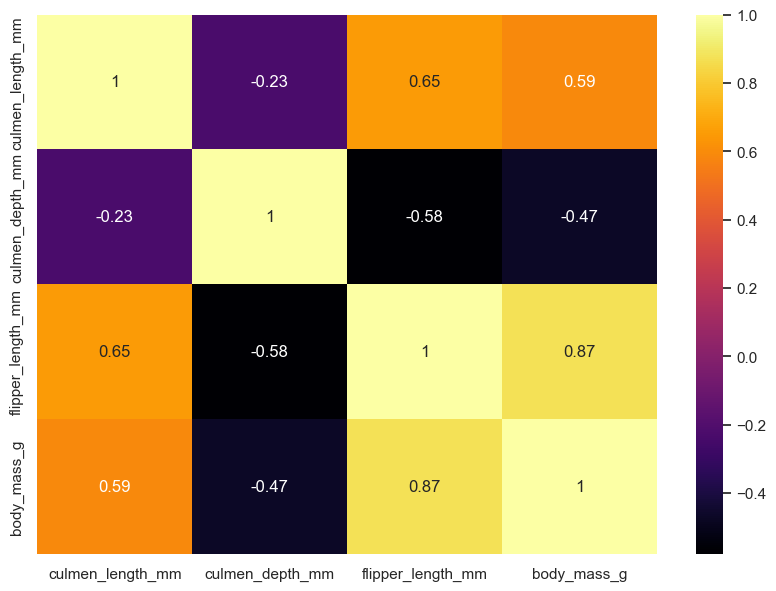

In [20]:
#heatmap showing the correlations between the data. We can see a strong correlation between body mass and flipper length
#we'll look more at that later
plt.figure(figsize=(10,7))
sns.heatmap(penguin_data[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].corr(), annot=True, cmap='inferno');

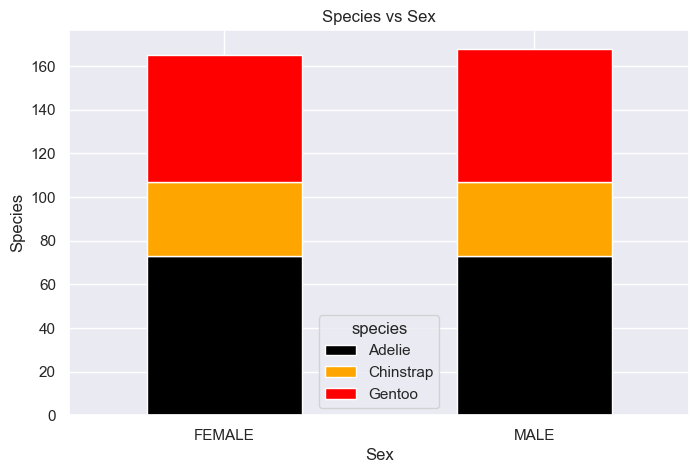

In [21]:
#graph showing the distribution of penguin species against their respective sex
#we can see that the proportion of male and female is equal in all species
pd.crosstab(penguin_data.sex, penguin_data.species).plot(kind="bar", stacked=True, figsize=(8,5), color=['black','orange','red'])
plt.title('Species vs Sex')
plt.xlabel('Sex')
plt.ylabel('Species')
plt.xticks(rotation=0)
plt.show()

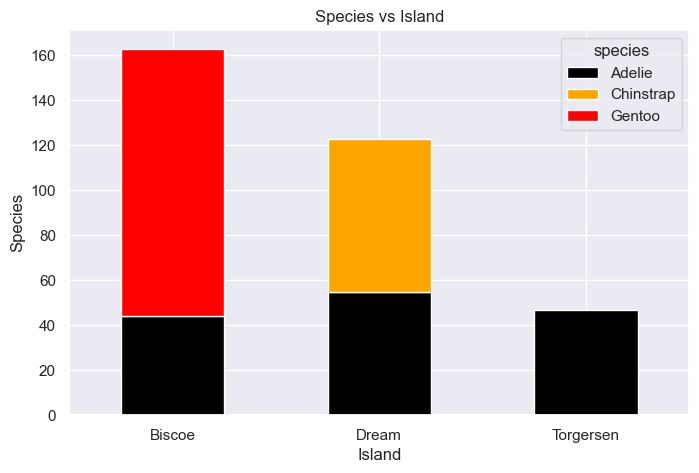

In [22]:
#graph showing the species vs their respective islands
#Adelie penguins can be found on each island whereas Chinstrap and Gentoo penguins are only found on their respective islands
pd.crosstab(penguin_data.island, penguin_data.species).plot(kind="bar", stacked=True, figsize=(8,5), color=['black','orange','red'])
plt.title('Species vs Island')
plt.xlabel('Island')
plt.ylabel('Species')
plt.xticks(rotation=0)
plt.show()

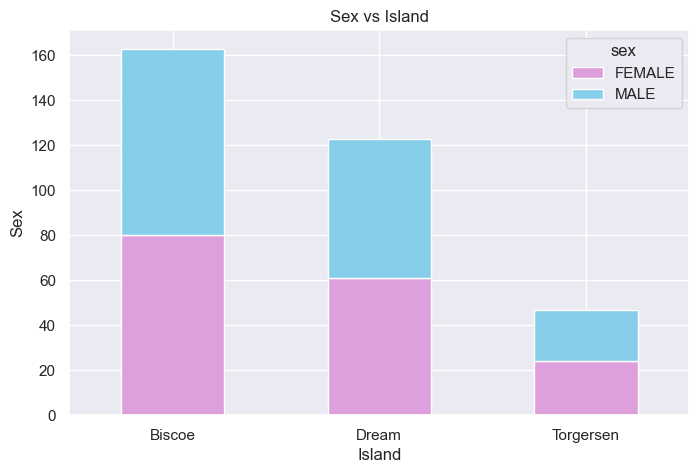

In [23]:
#graph showing the sex compared to island
#we can see that every island has a roughly equal amount of male to females 
#the penguins will do fine in populating the islands even more
pd.crosstab(penguin_data.island, penguin_data.sex).plot(kind="bar", stacked=True, figsize=(8,5), color=['plum','skyblue'])
plt.title('Sex vs Island')
plt.xlabel('Island')
plt.ylabel('Sex')
plt.xticks(rotation=0)
plt.show()

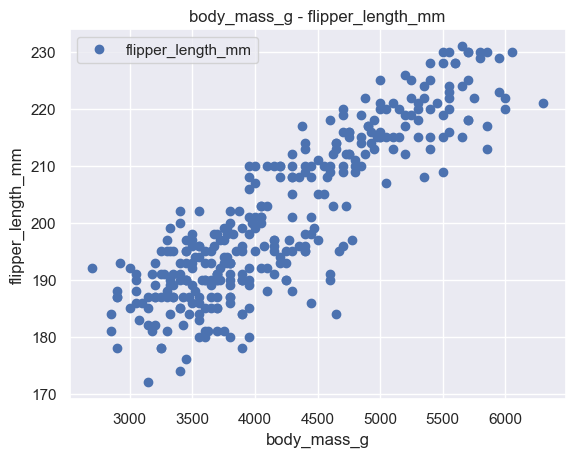

Pearson correlation: 0.8729788985653614
T Test and P value: Ttest_indResult(statistic=90.7746867058619, pvalue=0.0)


In [24]:
#Further investigating the correlation between body mass and flipper length
penguin_data.plot(x='body_mass_g', y='flipper_length_mm', style='o')  
plt.title('body_mass_g - flipper_length_mm')  
plt.xlabel('body_mass_g')
plt.ylabel('flipper_length_mm')  
plt.show()
print('Pearson correlation:', penguin_data['body_mass_g'].corr(penguin_data['flipper_length_mm']))
print('T Test and P value:', stats.ttest_ind(penguin_data['body_mass_g'], penguin_data['flipper_length_mm']))

In [25]:
# Check number of values before one hot encoding
print(penguin_data['island'].value_counts())
print(penguin_data['sex'].value_counts())

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
Name: count, dtype: int64


In [26]:
# Separating features and one hot encoding them
x = pd.get_dummies(penguin_data.drop('species', axis=1), columns=['island', 'sex'])
x.shape

(333, 9)

In [27]:
x

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False,False,True,False
340,46.8,14.3,215.0,4850.0,True,False,False,True,False
341,50.4,15.7,222.0,5750.0,True,False,False,False,True
342,45.2,14.8,212.0,5200.0,True,False,False,True,False


In [28]:
y = penguin_data['species']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y.shape

(333,)

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [30]:
#Spliting data into 80% training data & 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [31]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((266, 9), (266,), (67, 9), (67,))

In [32]:
#Running the logistic regression
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(x_train, y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.54      0.75      0.63        28
           1       0.00      0.00      0.00        15
           2       0.71      0.83      0.77        24

    accuracy                           0.61        67
   macro avg       0.42      0.53      0.47        67
weighted avg       0.48      0.61      0.54        67

[[21  0  7]
 [14  0  1]
 [ 4  0 20]]
LR accuracy: 61.19%


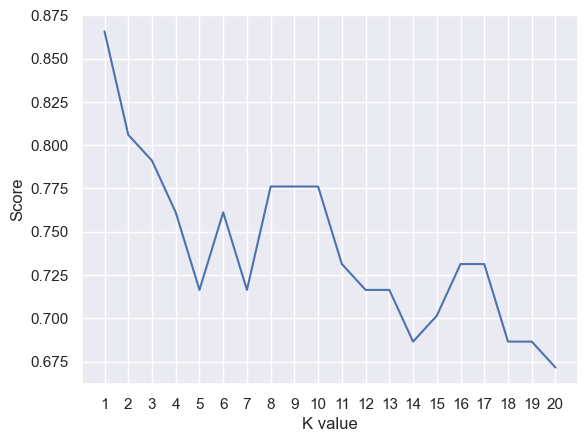

KNN best accuracy: 86.57%


In [33]:
#Running the K-Nearest Neighbors
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(x_train, y_train)
    scoreListknn.append(KNclassifier.score(x_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [34]:
#Running the SVM algorithm
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(x_train, y_train)

y_pred = SVCclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.58      0.89      0.70        28
           1       0.00      0.00      0.00        15
           2       0.83      0.83      0.83        24

    accuracy                           0.67        67
   macro avg       0.47      0.58      0.51        67
weighted avg       0.54      0.67      0.59        67

[[25  0  3]
 [14  0  1]
 [ 4  0 20]]
SVC accuracy: 67.16%


In [35]:
#Running Naive Bayes algorithm
NBclassifier2 = GaussianNB()
NBclassifier2.fit(x_train, y_train)

y_pred = NBclassifier2.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.60      1.00      0.75        15
           2       1.00      1.00      1.00        24

    accuracy                           0.85        67
   macro avg       0.87      0.88      0.84        67
weighted avg       0.91      0.85      0.85        67

[[18 10  0]
 [ 0 15  0]
 [ 0  0 24]]
Gaussian Naive Bayes accuracy: 85.07%


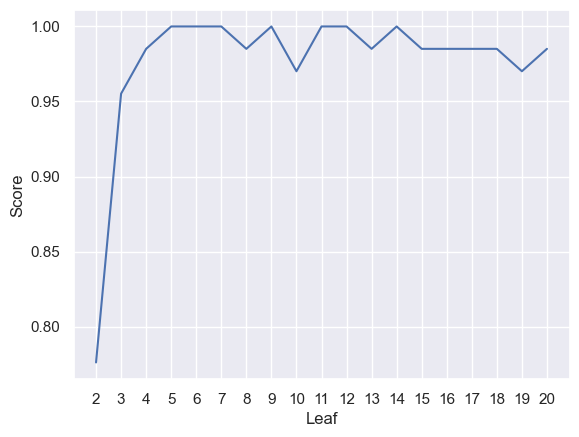

Decision Tree Accuracy: 100.00%


In [36]:
#Running Decision tree algorithm
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(x_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

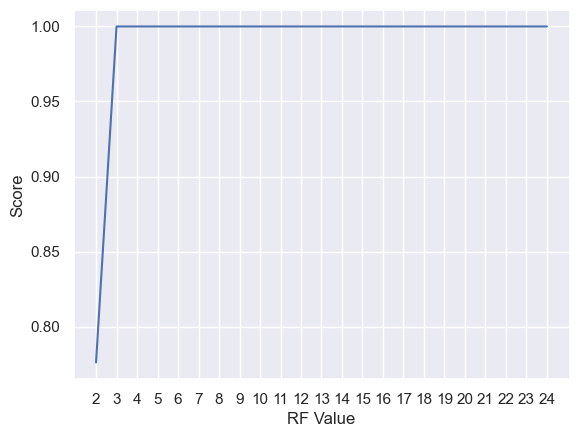

Random Forest Accuracy:  100.00%


In [37]:
#Running Random Forest algorithm
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(x_train, y_train)
    scoreListRF.append(RFclassifier.score(x_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [38]:
#Setting up parameters for Gradient Boosting
#once we get the best parameters we will use them throughout the analyse process
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [39]:
#initializing and fitting the model to Randomsized Search
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(x_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [40]:
#printing the best parameters
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=10, n_estimators=500,
                           subsample=1)
0.9887362637362637
{'subsample': 1, 'n_estimators': 500, 'max_leaf_nodes': 10, 'max_depth': 5}
8


In [41]:
#Running the Gradient Boosting algorithm with best parameters
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(x_train, y_train)

y_pred = GBclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67

[[28  0  0]
 [ 1 14  0]
 [ 0  0 24]]
Gradient Boosting accuracy: 98.51%


In [42]:
#Showing the models and their accuracy
#all of these models have not been validated with cross-validation we will run cross-validation further on and compare the two.
non_validated_comp = pd.DataFrame({'Model': ['Logistic Regression', 'K Nearest Neighbors', 
                                  'SVM','Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc2*100, DTAcc*100, RFAcc*100, GBAcc*100]})
non_validated_comp.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,Decision Tree,100.000000
5,Random Forest,100.000000
6,Gradient Boost,98.507463
1,K Nearest Neighbors,86.567164
3,Gaussian NB,85.074627
2,SVM,67.164179
0,Logistic Regression,61.194030


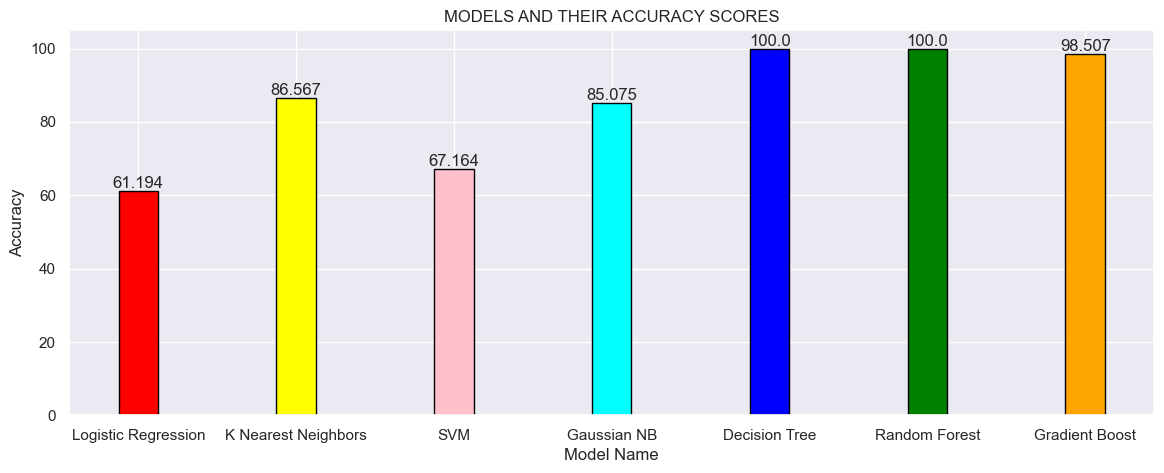

In [43]:
#Vizualing the models and accuracy score to show the comparision between them
fig = plt.figure(figsize = (14, 5))
barplot = plt.bar(non_validated_comp.Model, non_validated_comp.Accuracy, color =['red', 'yellow', 'pink', 'cyan', 'blue', 'green', 'orange'] 
                  ,edgecolor = "black", width = 0.25)
plt.bar_label(barplot , labels= round(non_validated_comp.Accuracy,3))
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("MODELS AND THEIR ACCURACY SCORES")
plt.show()

In [44]:
# Now we move on to the Cross-Validation
# First we split the data into 5 folds. 
# We will use the 'kf'(StratiFiedKFold splitting stratergy) object as input to the cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 266, Test set:67
Fold:2, Train set: 266, Test set:67
Fold:3, Train set: 266, Test set:67
Fold:4, Train set: 267, Test set:66
Fold:5, Train set: 267, Test set:66


In [45]:
#train model with Logistic Regression
score = cross_val_score(linear_model.LogisticRegression(random_state= 42), x, y, cv= kf, scoring="accuracy")
KFLogAcc= score.mean()

#print each cv score (accuracy) and average them
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(KFLogAcc)}')

Scores for each fold are: [1.         1.         0.98507463 0.98484848 0.98484848]
Average score: 0.99


In [46]:
#train model with KNN
score = cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=1), x, y, cv=kf, scoring = "accuracy")
KFKNNAcc = score.mean()

#print each cv score (accuracy) and average them
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(KFKNNAcc)}')

Scores for each fold are: [0.82089552 0.89552239 0.88059701 0.84848485 0.81818182]
Average score: 0.85


In [47]:
#train model with Logistic Regression
score = cross_val_score(svm.SVC(random_state= 42), x, y, cv=kf, scoring = "accuracy")
KFSVMAcc = score.mean()

#print each cv score (accuracy) and average them
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(KFSVMAcc)}')

Scores for each fold are: [0.70149254 0.74626866 0.7761194  0.72727273 0.66666667]
Average score: 0.72


In [48]:
#train model with Naive Bayes
score = cross_val_score(naive_bayes.GaussianNB(), x, y, cv=kf, scoring = "accuracy")
KFNaiveAcc = score.mean()

#print each cv score (accuracy) and average them
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(KFNaiveAcc)}')

Scores for each fold are: [0.82089552 0.91044776 0.85074627 0.83333333 0.75757576]
Average score: 0.83


In [49]:
#train model with Decision Tree
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
KFDecAcc = score.mean()

#print each cv score (accuracy) and average them
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(KFDecAcc)}')

Scores for each fold are: [0.98507463 0.98507463 0.94029851 0.96969697 0.93939394]
Average score: 0.96


In [50]:
#train model with Random Forest
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), x, y, cv= kf, scoring="accuracy")
KFRanAcc = score.mean()

#print each cv score (accuracy) and average them
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(KFRanAcc)}')

Scores for each fold are: [0.98507463 1.         0.98507463 1.         0.98484848]
Average score: 0.99


In [51]:
#train model with Gradient Boost
score = cross_val_score(ensemble.GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10),
                        x, y, cv=kf, scoring = "accuracy")

KFGBAcc = score.mean()

#print each cv score (accuracy) and average them
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(KFGBAcc)}')

Scores for each fold are: [0.97014925 0.98507463 0.97014925 0.98484848 0.96969697]
Average score: 0.98


In [52]:
#now we can compare the validated models scores with each other
validated_comp = pd.DataFrame({'Model': ['Logistic Regression', 'K Nearest Neighbors', 
                                  'SVM','Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [KFLogAcc*100, KFKNNAcc*100, KFSVMAcc*100, 
                                     KFNaiveAcc*100, KFDecAcc*100, KFRanAcc*100, KFGBAcc*100]})
validated_comp.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,99.099955
0,Logistic Regression,99.095432
6,Gradient Boost,97.598372
4,Decision Tree,96.390773
1,K Nearest Neighbors,85.273632
3,Gaussian NB,83.459973
2,SVM,72.356400


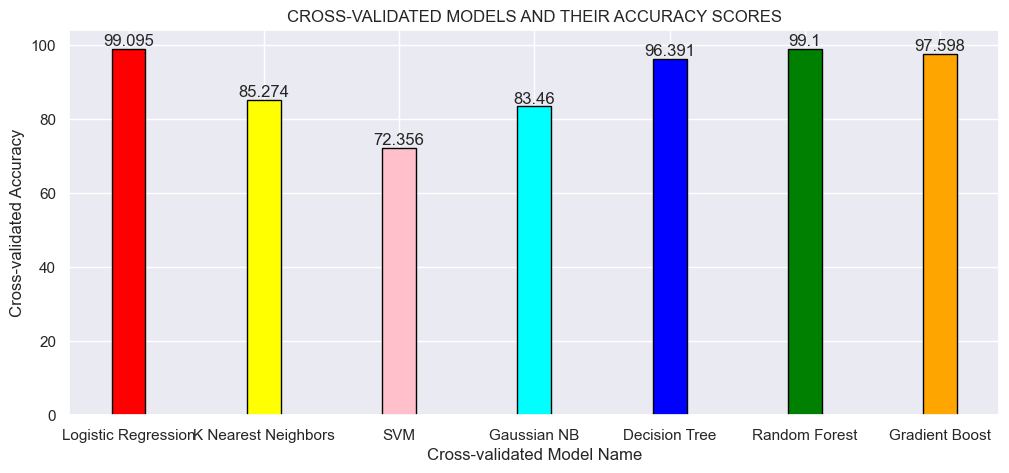

In [53]:
#Vizual representation of the comparision
fig = plt.figure(figsize = (12, 5))
barplot = plt.bar(validated_comp.Model, validated_comp.Accuracy, color =['red', 'yellow', 'pink', 'cyan', 'blue', 'green', 'orange'] 
                  ,edgecolor = "black", width = 0.25)
plt.bar_label(barplot , labels= round(validated_comp.Accuracy,3))
plt.xlabel("Cross-validated Model Name")
plt.ylabel("Cross-validated Accuracy")
plt.title("CROSS-VALIDATED MODELS AND THEIR ACCURACY SCORES")
plt.show()

In [54]:
#Align the different models, accuracy and validity on the columns
nonvsval = non_validated_comp.compare(validated_comp, keep_equal=True, keep_shape=True, result_names=('not_validated', 'validated'))
nonvsval

Model                           Accuracy           
         not_validated            validated not_validated  validated
0  Logistic Regression  Logistic Regression     61.194030  99.095432
1  K Nearest Neighbors  K Nearest Neighbors     86.567164  85.273632
2                  SVM                  SVM     67.164179  72.356400
3          Gaussian NB          Gaussian NB     85.074627  83.459973
4        Decision Tree        Decision Tree    100.000000  96.390773
5        Random Forest        Random Forest    100.000000  99.099955
6       Gradient Boost       Gradient Boost     98.507463  97.598372

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

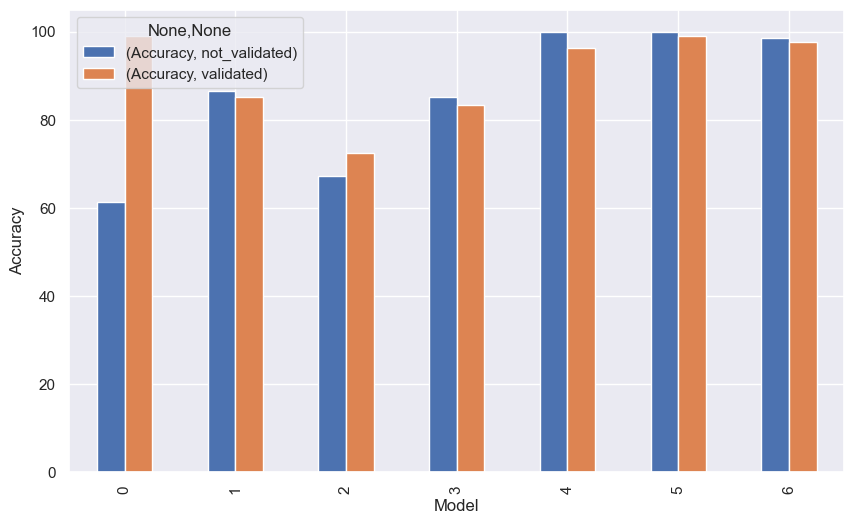

In [55]:
#Here we plot the scores with the non-validated and validated models
nonvsval.plot(kind='bar', figsize=(10,6), ylabel='Accuracy', xlabel='Model')

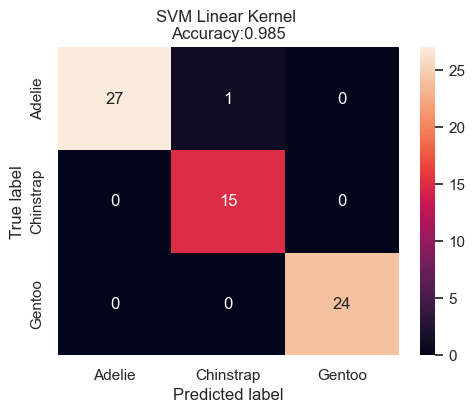

In [56]:
#Lastly we're going test all the models with a confusion matrix
clf = SVC(kernel = 'linear').fit(x_train, y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Adelie','Chinstrap','Gentoo'], 
                     columns = ['Adelie','Chinstrap','Gentoo'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [57]:
#fit model
lr = LogisticRegression()
lr.fit(x_train,y_train)
cf_LRscore = lr.score(x_test,y_test)
print('Logistic Regression Accuracy :', cf_LRscore)

#confusion matrix
y_pred = lr.predict(x_test)
y_true = y_test

#print results
cm_lr = confusion_matrix(y_true,y_pred)

Logistic Regression Accuracy : 0.9850746268656716


In [58]:
#fit model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
cf_LNNscore = knn.score(x_test,y_test)
print('K-Nearest Neighbors Accuracy :', cf_LNNscore)

# confusion matrix
y_pred = knn.predict(x_test)
y_true = y_test

#print results
cm_knn = confusion_matrix(y_true,y_pred)

K-Nearest Neighbors Accuracy : 0.7910447761194029


In [59]:
#fit model
svm = SVC(random_state=1)
svm.fit(x_train,y_train)
cf_SVMscore = svm.score(x_test,y_test)
print('SVM Accuracy :', cf_SVMscore)

#confusion matrix
y_pred = svm.predict(x_test)
y_true = y_test

#print results
cm_svm = confusion_matrix(y_true,y_pred)

SVM Accuracy : 0.6716417910447762


In [60]:
#fit model
nb = GaussianNB()
nb.fit(x_train,y_train)
cf_NBscore = nb.score(x_test,y_test)
print('Naive Bayes Accuracy : ', cf_SVMscore)

#confusion matrix
y_pred = nb.predict(x_test)
y_true = y_test

#print results
cm_nb = confusion_matrix(y_true,y_pred)

Naive Bayes Accuracy :  0.6716417910447762


In [61]:
#fit model
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
cf_DTscore = dt.score(x_test,y_test)
print('Decision Tree accuracy : ', cf_DTscore)

#confusion matrix
y_pred = dt.predict(x_test)
y_true = y_test

#print results
cm_dt = confusion_matrix(y_true,y_pred)

Decision Tree accuracy :  0.9850746268656716


In [62]:
#fit model
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
cf_RFscore = rf.score(x_test,y_test)
print('Random Forest Accuracy : ', cf_RFscore)

#confusion matrix
y_pred = rf.predict(x_test)
y_true = y_test

#print results
cm_rf = confusion_matrix(y_true,y_pred)

Random Forest Accuracy :  1.0


In [63]:
#fit model
gb = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
gb.fit(x_train, y_train)
cf_GBscore = gb.score(x_test,y_test)
print('Gradient Boosting Accuracy : ', cf_GBscore)

#confusion matrix
y_pred = gb.predict(x_test)
y_true = y_test

#print results
cm_gb = confusion_matrix(y_true, y_pred)

Gradient Boosting Accuracy :  1.0


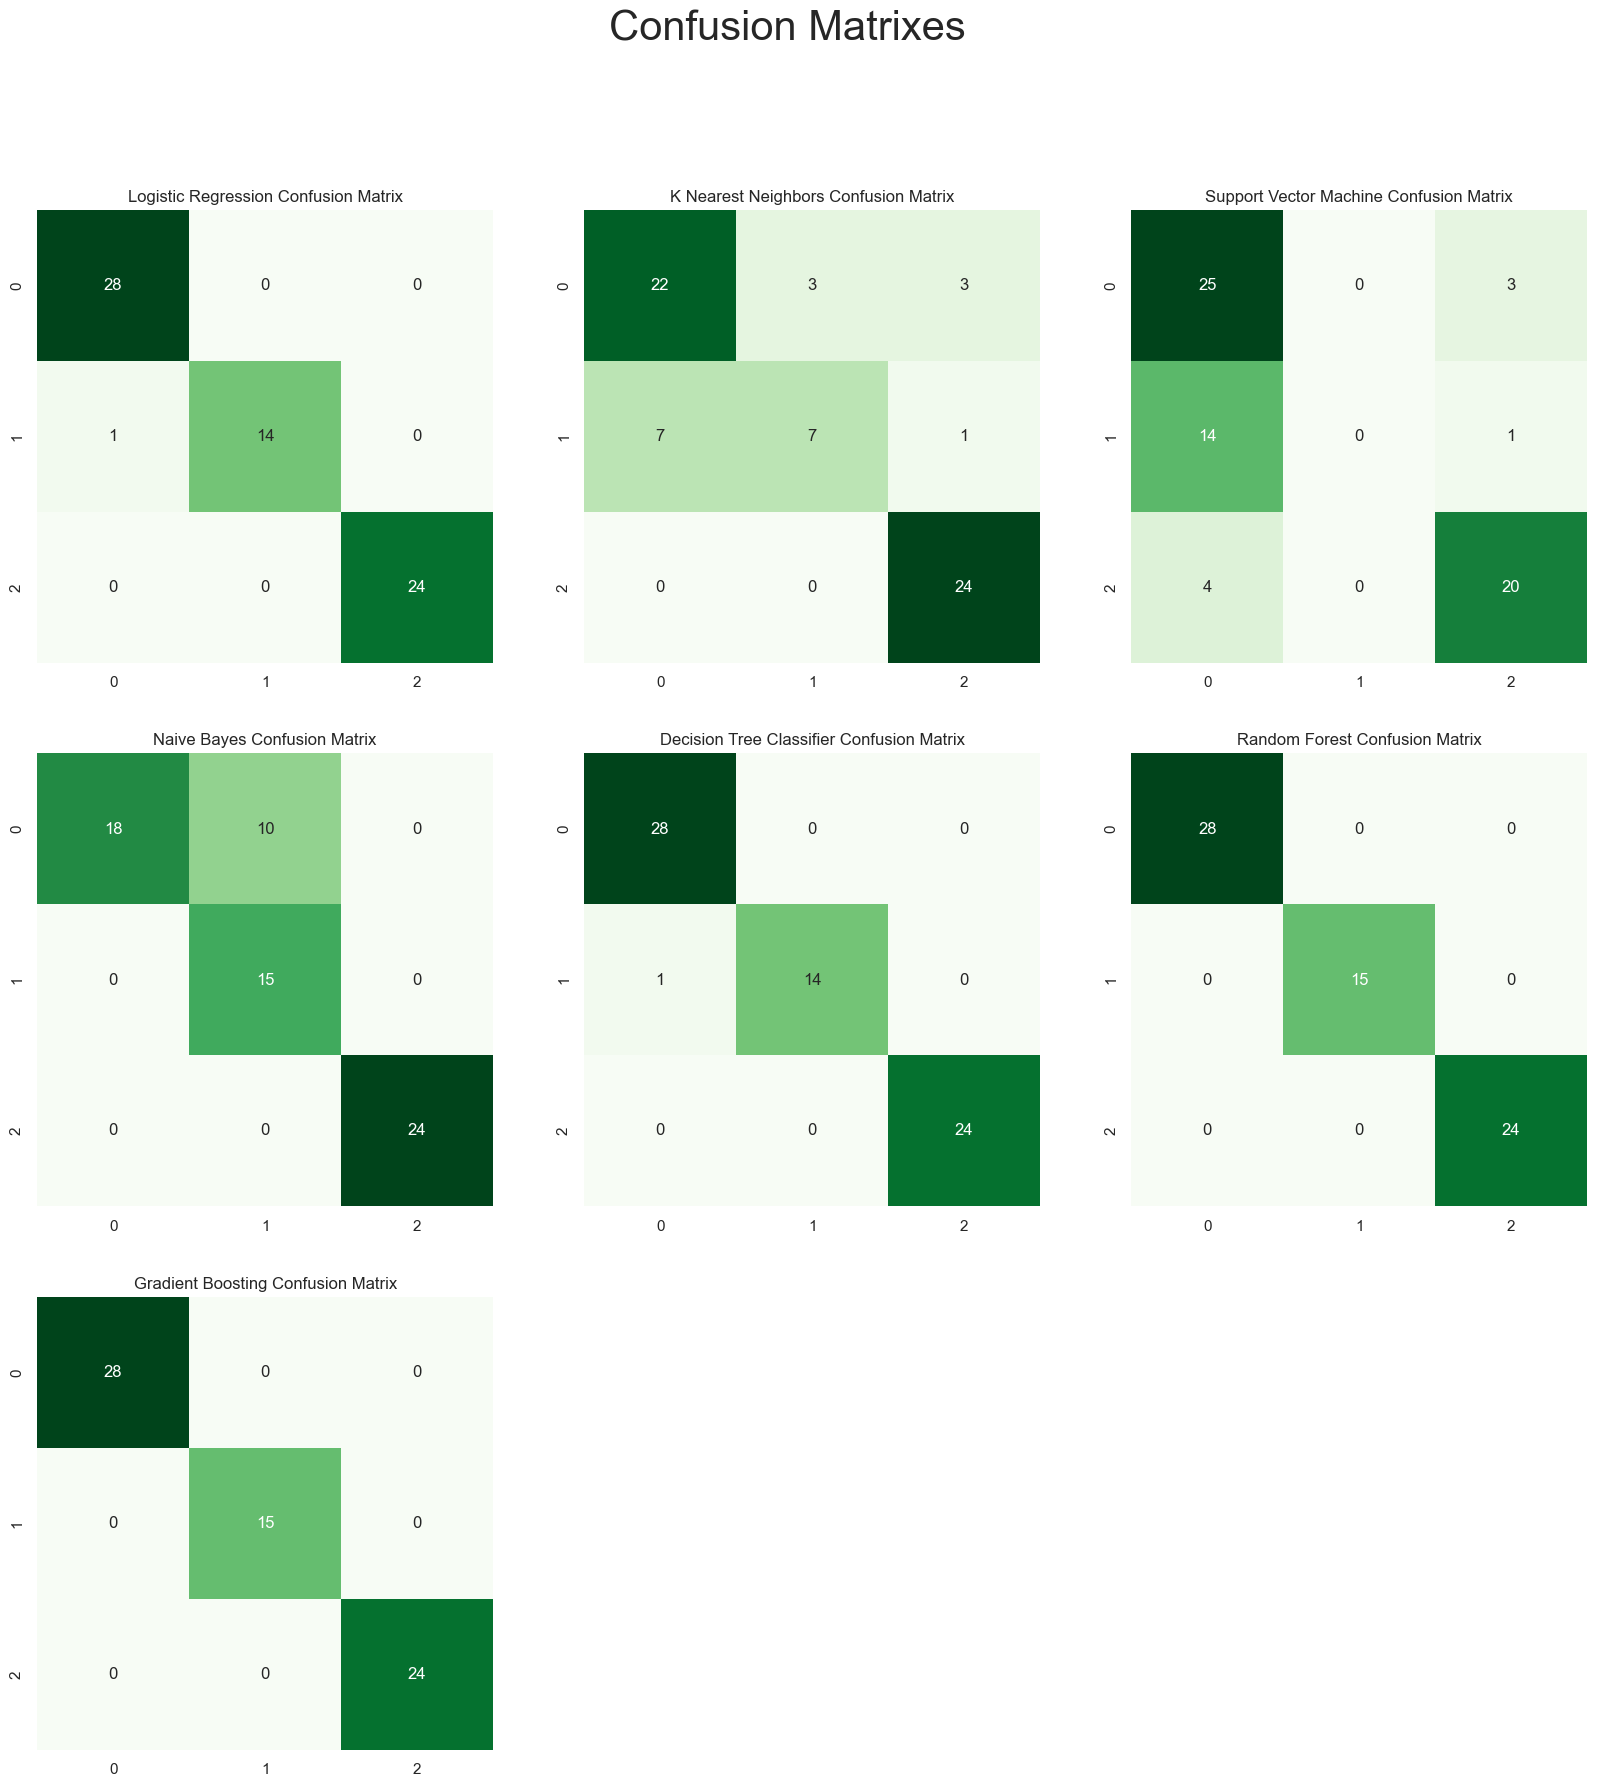

In [64]:
#here we're showing a graph of all the confusion matrixes
plt.figure(figsize=(20,20))

plt.suptitle("Confusion Matrixes", fontsize=30)

plt.subplot(3,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, cbar=False, annot=True, cmap="Greens", fmt="d")

plt.subplot(3,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn, cbar=False, annot=True, cmap="Greens", fmt="d")

plt.subplot(3,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm, cbar=False, annot=True, cmap="Greens", fmt="d")

plt.subplot(3,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb, cbar=False, annot=True, cmap="Greens", fmt="d")

plt.subplot(3,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt, cbar=False, annot=True, cmap="Greens", fmt="d")

plt.subplot(3,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf, cbar=False, annot=True, cmap="Greens", fmt="d")

plt.subplot(3,3,7)
plt.title("Gradient Boosting Confusion Matrix")
sns.heatmap(cm_gb, cbar=False, annot=True, cmap="Greens", fmt="d")

plt.show()

In [65]:
#finally we're going to compare the confusion matrixes with each other
#then with the valid and non-validated data
confused_comp = pd.DataFrame({'Model': ['Logistic Regression', 'K Nearest Neighbors', 
                                  'SVM','Gaussian NB', 'Decision Tree','Random Forest', 'Gradient Boosting'], 
                        'Accuracy': [cf_LRscore*100, cf_LNNscore*100, cf_SVMscore*100, 
                                     cf_NBscore*100, cf_DTscore*100, cf_RFscore*100, cf_GBscore*100]})
confused_comp.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,100.000000
6,Gradient Boosting,100.000000
0,Logistic Regression,98.507463
4,Decision Tree,98.507463
3,Gaussian NB,85.074627
1,K Nearest Neighbors,79.104478
2,SVM,67.164179


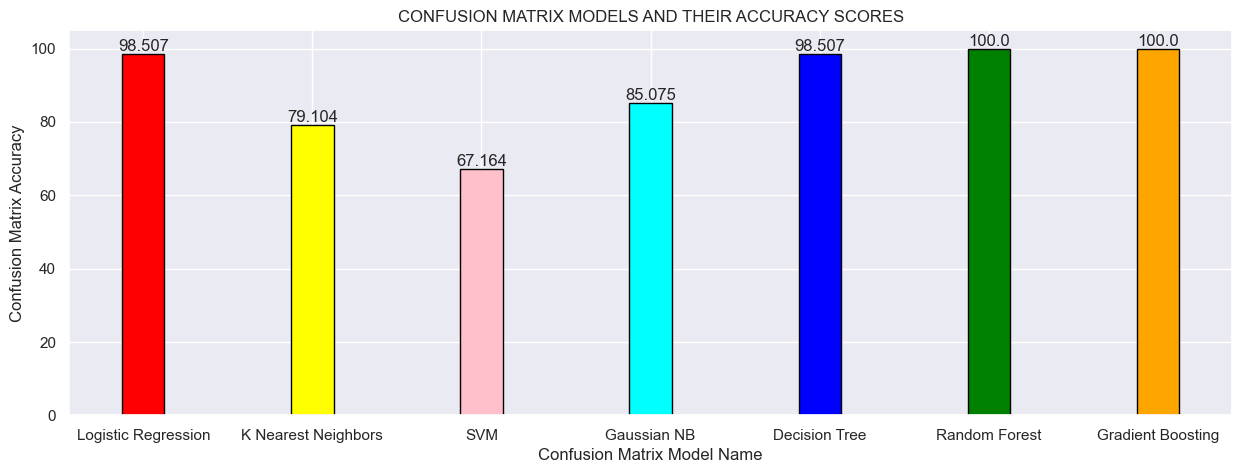

In [66]:
#graph showing the confusion matrix models and their accuracy scores
fig = plt.figure(figsize = (15, 5))
barplot = plt.bar(confused_comp.Model, confused_comp.Accuracy, color =['red', 'yellow', 'pink', 'cyan', 'blue', 'green', 'orange'] 
                  ,edgecolor = "black", width = 0.25)
plt.bar_label(barplot , labels= round(confused_comp.Accuracy,3))
plt.xlabel("Confusion Matrix Model Name")
plt.ylabel("Confusion Matrix Accuracy")
plt.title("CONFUSION MATRIX MODELS AND THEIR ACCURACY SCORES")
plt.show()

In [67]:
#here we create a dataframe to compare all there iterations of the model
finals = pd.concat([non_validated_comp, validated_comp, confused_comp], axis=1, join='inner')
finals

# Columns to not rename
excluded = finals.columns[~finals.columns.duplicated(keep=False)]

# An incrementer
import itertools
inc = itertools.count().__next__

# A renamer
def ren(name):
    return f"{name}{inc()}" if name not in excluded else name

# Use inside rename()
finals = finals.rename(columns=ren)

#show the conjoined dataframe
finals

,Model0,Accuracy1,Model2,Accuracy3,Model4,Accuracy5
0,Logistic Regression,61.194030,Logistic Regression,99.095432,Logistic Regression,98.507463
1,K Nearest Neighbors,86.567164,K Nearest Neighbors,85.273632,K Nearest Neighbors,79.104478
2,SVM,67.164179,SVM,72.356400,SVM,67.164179
3,Gaussian NB,85.074627,Gaussian NB,83.459973,Gaussian NB,85.074627
4,Decision Tree,100.000000,Decision Tree,96.390773,Decision Tree,98.507463
5,Random Forest,100.000000,Random Forest,99.099955,Random Forest,100.000000
6,Gradient Boost,98.507463,Gradient Boost,97.598372,Gradient Boosting,100.000000


In [68]:
#renaming and removing duplicate model columns
finals.rename(
    columns={"Model0": "Model", "Accuracy1": "not-validated", "Accuracy3": "cross-validated", "Accuracy5": "confusion matrix", },
    inplace=True,
)
finals.drop(['Model2', 'Model4'], axis=1, inplace=True)

finals

,Model,not-validated,cross-validated,confusion matrix
0,Logistic Regression,61.194030,99.095432,98.507463
1,K Nearest Neighbors,86.567164,85.273632,79.104478
2,SVM,67.164179,72.356400,67.164179
3,Gaussian NB,85.074627,83.459973,85.074627
4,Decision Tree,100.000000,96.390773,98.507463
5,Random Forest,100.000000,99.099955,100.000000
6,Gradient Boost,98.507463,97.598372,100.000000


In [69]:
#setting the index to model to appear better on the graph
finals.set_index("Model", inplace=True)
finals

,not-validated,cross-validated,confusion matrix
Model,,,
Logistic Regression,61.194030,99.095432,98.507463
K Nearest Neighbors,86.567164,85.273632,79.104478
SVM,67.164179,72.356400,67.164179
Gaussian NB,85.074627,83.459973,85.074627
Decision Tree,100.000000,96.390773,98.507463
Random Forest,100.000000,99.099955,100.000000
Gradient Boost,98.507463,97.598372,100.000000


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

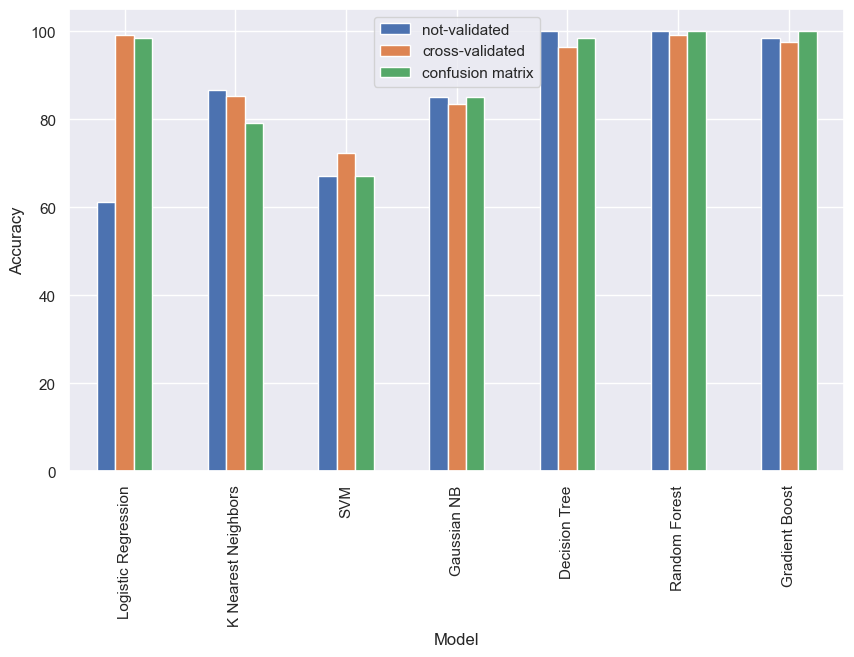

In [70]:
#graph showing the comparasion between un-validated models, validated models and models run through a confusion matrix
finals.plot(kind='bar', figsize=(10,6), ylabel='Accuracy', xlabel='Model')